<div class="alert">
    <h2 align="center">CIFAR-10</h2>
    <h3 align="center"><a href="https://github.com/amirjahantab/">Amirreza Jahantab</a></h3>
</div>

In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation
import warnings;warnings.filterwarnings(action='ignore')

In [30]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10

num_train = 49000

# Load CIFAR10 Dataset

In [32]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'Train data shape: {X_train.shape}')
print(f'Test  data shape: {X_test.shape}')

Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)


## Data Visualization

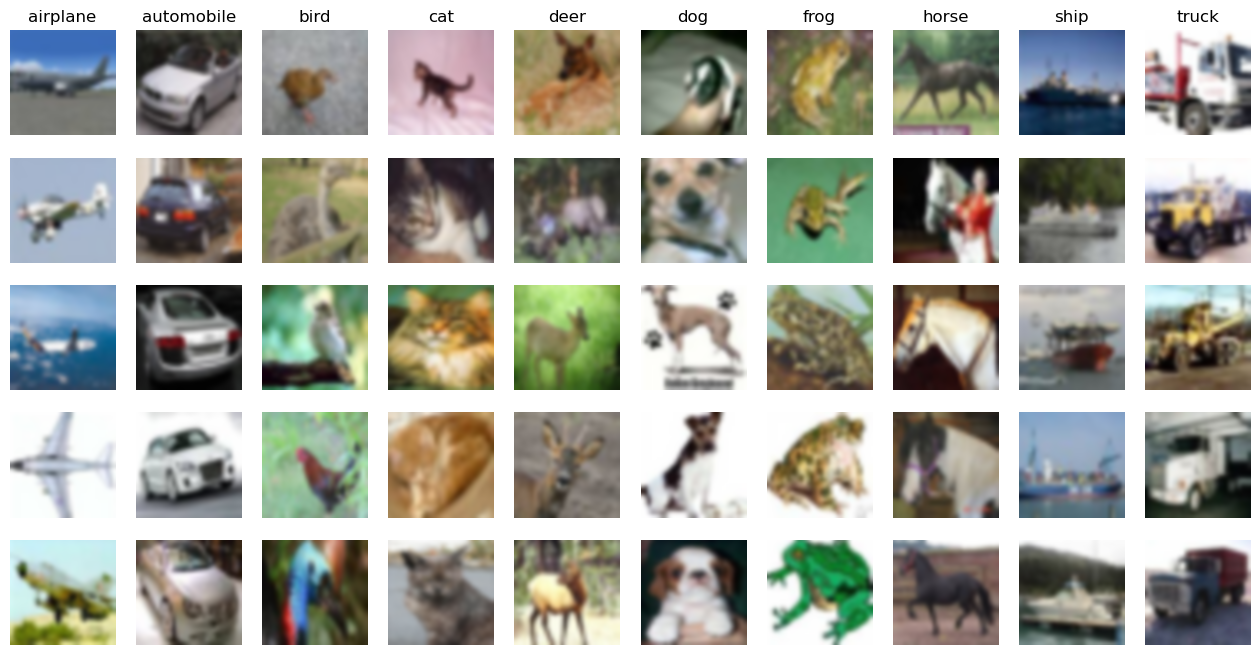

In [34]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + cls + 1 # cls=0 -> (1, 11,...,61), cls=2 -> (2, 12,...,62),...,cls=9 ->(10, 20,...,70)
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx], interpolation='bicubic') # Interpolation used to smooth the appearance of plotted data
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

## Data Preprocessing

In [36]:
# Convert 4D arrays to 2D arrays
X_train = X_train.reshape([-1, num_features]) # num_features=3072
X_test  =  X_test.reshape([-1, num_features])

print(f'Train data shape: {X_train.shape}')
print(f'Test  data shape: {X_test.shape}')

Train data shape: (50000, 3072)
Test  data shape: (10000, 3072)


In [37]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## One-hot encodding
- We have 10 classes: 0, 1, ..., 9

In one-hot encoding, we represent labels using vectors.

```python
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [149]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10, 10)
(10000, 10)


# Linear Classifier

## $$f(x, W, b) = Wx+b$$

<img src="imgs/linear_classifier.jpg" width="75%"/>

__creating a simple neural network with one layer__

In [43]:
model = Sequential()  # a sequence of layers (from keras.models import Sequential)
model.add(Dense(num_classes, input_shape=(num_features,), activation='softmax')) # add Dense hidden layer with 10 neurons 

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 10)                  │          30,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [46]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(X_train[:num_train], y_train[:num_train], 
                    batch_size=512, 
                    epochs=15,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)

Epoch 1/15
96/96 - 2s - 24ms/step - accuracy: 0.2222 - loss: 2.1440 - val_accuracy: 0.2930 - val_loss: 2.0392
Epoch 2/15
96/96 - 0s - 5ms/step - accuracy: 0.3018 - loss: 1.9869 - val_accuracy: 0.3330 - val_loss: 1.9635
Epoch 3/15
96/96 - 0s - 5ms/step - accuracy: 0.3276 - loss: 1.9288 - val_accuracy: 0.3430 - val_loss: 1.9223
Epoch 4/15
96/96 - 1s - 7ms/step - accuracy: 0.3447 - loss: 1.8944 - val_accuracy: 0.3490 - val_loss: 1.8967
Epoch 5/15
96/96 - 0s - 5ms/step - accuracy: 0.3564 - loss: 1.8710 - val_accuracy: 0.3590 - val_loss: 1.8767
Epoch 6/15
96/96 - 0s - 5ms/step - accuracy: 0.3638 - loss: 1.8536 - val_accuracy: 0.3550 - val_loss: 1.8635
Epoch 7/15
96/96 - 1s - 7ms/step - accuracy: 0.3694 - loss: 1.8400 - val_accuracy: 0.3620 - val_loss: 1.8526
Epoch 8/15
96/96 - 1s - 7ms/step - accuracy: 0.3735 - loss: 1.8288 - val_accuracy: 0.3650 - val_loss: 1.8431
Epoch 9/15
96/96 - 0s - 4ms/step - accuracy: 0.3779 - loss: 1.8195 - val_accuracy: 0.3720 - val_loss: 1.8368
Epoch 10/15
96/96 

In [48]:
model.save('Linear-model.h5')

In [49]:
history.history

{'accuracy': [0.2222040742635727,
  0.3018367290496826,
  0.3276122510433197,
  0.34465306997299194,
  0.3563673496246338,
  0.3638163208961487,
  0.3693673610687256,
  0.3734897971153259,
  0.37785714864730835,
  0.3814285695552826,
  0.3841020464897156,
  0.3865306079387665,
  0.3884081542491913,
  0.38967347145080566,
  0.3918571472167969],
 'loss': [2.144036054611206,
  1.9868606328964233,
  1.928816795349121,
  1.8944391012191772,
  1.8710256814956665,
  1.8535969257354736,
  1.8399816751480103,
  1.8288151025772095,
  1.8194936513900757,
  1.8115040063858032,
  1.8044922351837158,
  1.7983194589614868,
  1.7928439378738403,
  1.7878323793411255,
  1.783316969871521],
 'val_accuracy': [0.2930000126361847,
  0.3330000042915344,
  0.34299999475479126,
  0.3490000069141388,
  0.35899999737739563,
  0.35499998927116394,
  0.3619999885559082,
  0.36500000953674316,
  0.3720000088214874,
  0.3790000081062317,
  0.3790000081062317,
  0.3840000033378601,
  0.3840000033378601,
  0.38600000

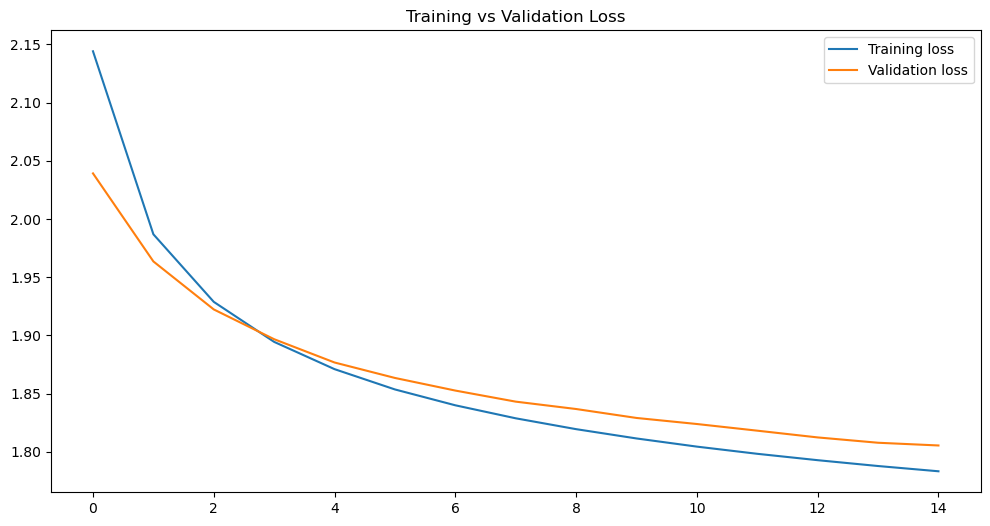

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

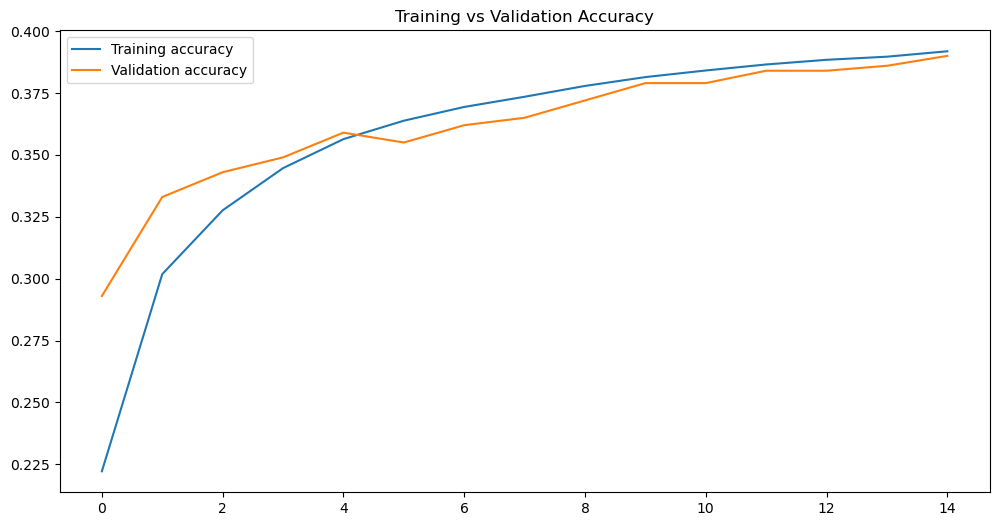

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

## Predicting class for new images

In [53]:
# Select 25 random images from test images
idx = np.random.choice(x_test.shape[0], 25, replace=False)

# predict class for selected images
y_pred = model.predict(x_test[idx]).argmax(axis=1)

# True class for selected images
y_true = y_test[idx].argmax(axis=1)

print('Test Accuracy = %.2f' % (100.0 * np.mean(y_pred == y_true)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Test Accuracy = 48.00


In [54]:
len(X_test[idx[0]])

3072

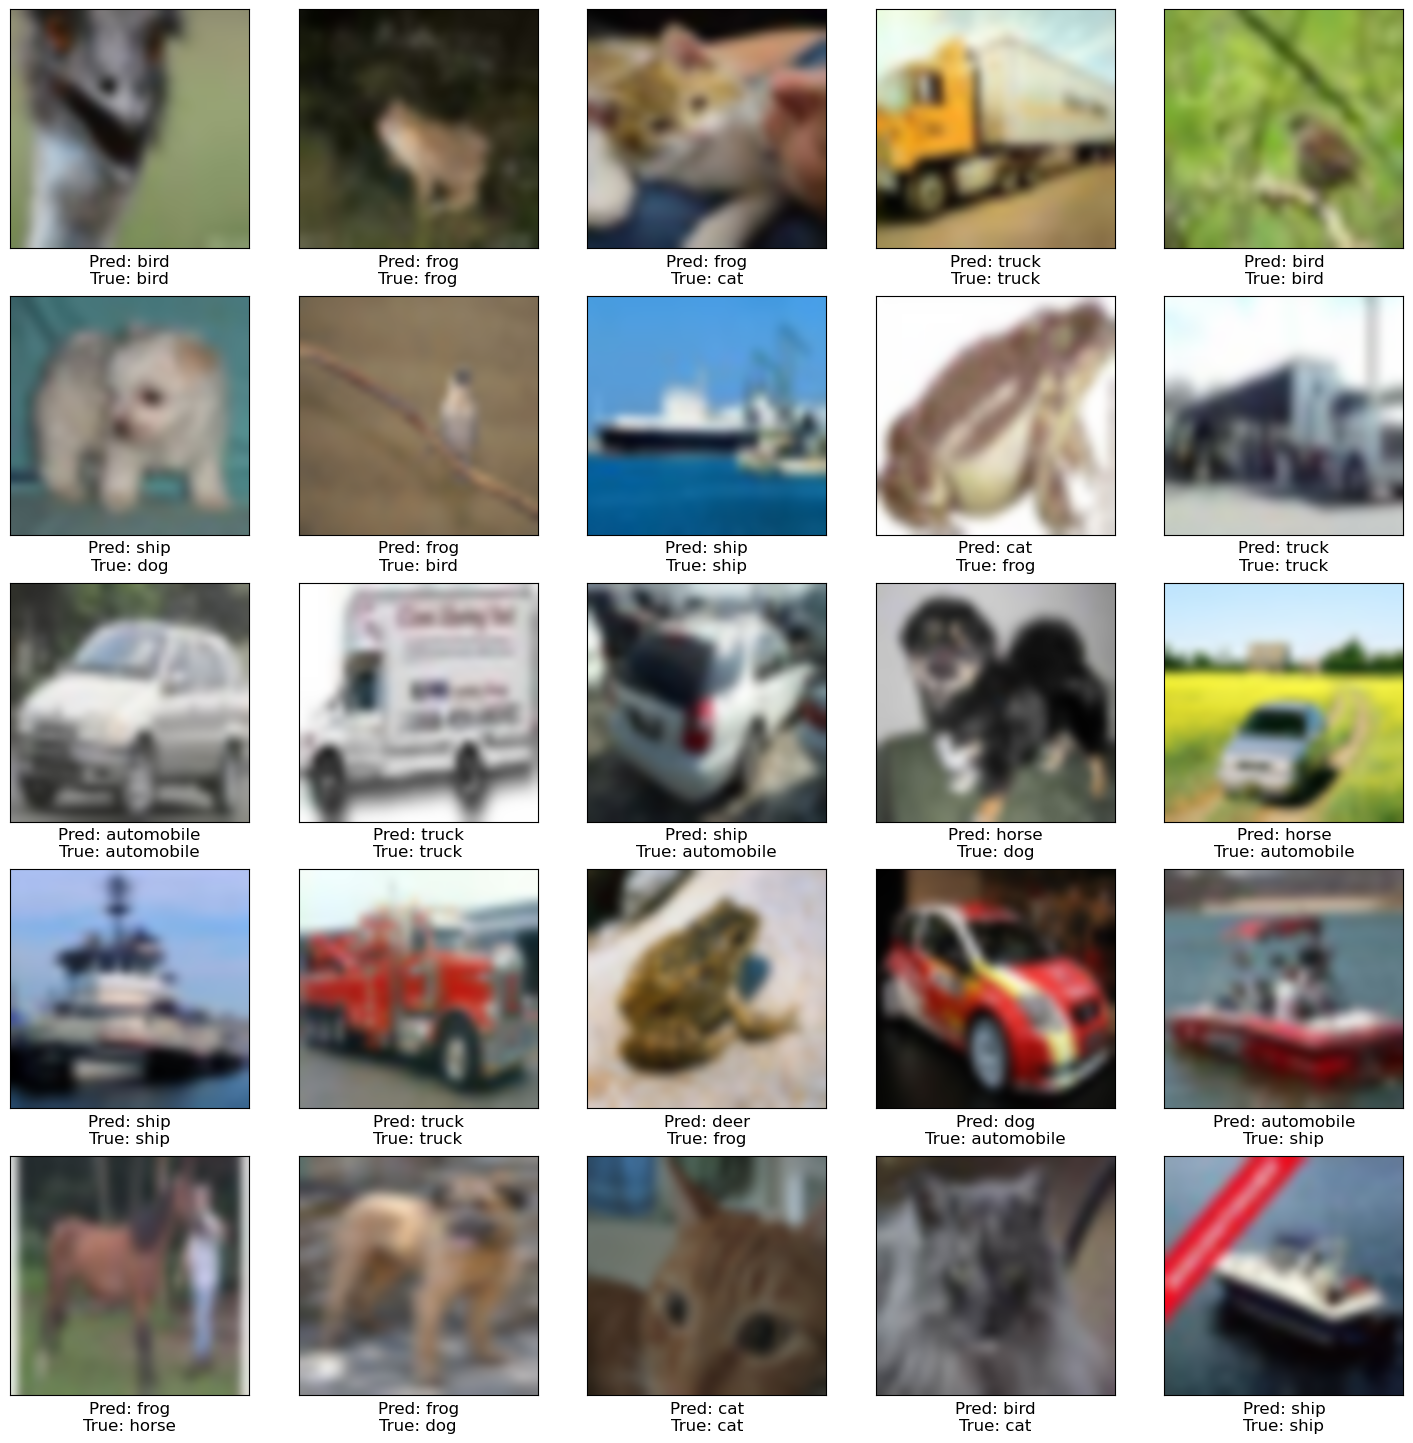

In [55]:
fig, axes = plt.subplots(5, 5, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[idx[i]].reshape(image_size, image_size, num_channels), interpolation='bicubic')
    pred_class = class_names[y_pred[i]]
    true_class = class_names[y_true[i]]
    ax.set_xlabel('Pred: {}\nTrue: {}'.format(pred_class, true_class), fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

# Multi-layer Neural Network

### $$f(x) = W_3 \times \max(W_2 \times \max(0, W_1 x))$$

<img src="imgs/neural_net2.jpeg" width="50%"/>

In [58]:
model = Sequential()

# First hidden Layer
model.add(Dense(units=100, input_shape=(num_features,), activation='relu'))

# Second hidden Layer
model.add(Dense(units=100, activation='relu'))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 318,410 (1.21 MB)

 Trainable params: 318,410 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [61]:
optimizer = keras.optimizers.RMSprop()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3543 - loss: 1.8100 - val_accuracy: 0.4420 - val_loss: 1.5634
Epoch 2/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4756 - loss: 1.4997 - val_accuracy: 0.4830 - val_loss: 1.4601
Epoch 3/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5134 - loss: 1.3933 - val_accuracy: 0.4790 - val_loss: 1.4859
Epoch 4/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5359 - loss: 1.3209 - val_accuracy: 0.5120 - val_loss: 1.4358
Epoch 5/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5560 - loss: 1.2601 - val_accuracy: 0.4990 - val_loss: 1.4116
Epoch 6/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5730 - loss: 1.2236 - val_accuracy: 0.5090 - val_loss: 1.3915
Epoch 7/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5953 - loss: 1.1727 - val_accuracy: 0.5110 - val_loss: 1.4317
Epoch 8/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6032 - loss: 1.1395 - val_accuracy: 0

In [65]:
model.save('nn.h5')
# model = keras.models.load_model('nn.h5')

## Adding Dropout and Batch Normalization

In [68]:
from keras.layers import BatchNormalization, Dropout

In [70]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

# print model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,210 (1.22 MB)

 Trainable params: 318,810 (1.22 MB)

 Non-trainable params: 400 (1.56 KB)

### Training the model

In [73]:
optimizer = keras.optimizers.Adam(learning_rate=0.02, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3085 - loss: 1.9356 - val_accuracy: 0.4320 - val_loss: 1.6065
Epoch 2/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4112 - loss: 1.6396 - val_accuracy: 0.4730 - val_loss: 1.4567
Epoch 3/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4442 - loss: 1.5483 - val_accuracy: 0.4980 - val_loss: 1.4178
Epoch 4/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4638 - loss: 1.5005 - val_accuracy: 0.5040 - val_loss: 1.3676
Epoch 5/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4742 - loss: 1.4584 - val_accuracy: 0.5150 - val_loss: 1.3717
Epoch 6/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4857 - loss: 1.4280 - val_accuracy: 0.5170 - val_loss: 1.3491
Epoch 7/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4970 - loss: 1.4038 - val_accuracy: 0.5170 - val_loss: 1.3443
Epoch 8/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5033 - loss: 1.3714 - val_accu

In [76]:
model.save('nn-dropout-bn.h5')
# model = keras.models.load_model('nn-dropout-bn.h5')

In [77]:
model.evaluate(x_test, y_test, batch_size=256)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5278 - loss: 1.3232


[1.3254777193069458, 0.5277000069618225]

# Convolutional Neural Networks

## Converting dataset to 4D array

In [80]:
X_train = X_train.reshape((-1, image_size, image_size, num_channels))
X_test  =  X_test.reshape((-1, image_size, image_size, num_channels))
x_test  =  x_test.reshape((-1, image_size, image_size, num_channels))

In [81]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [82]:
def create_cnn():
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Classifier
    model.add(Flatten()) # convert to 2D
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

model = create_cnn()

#print model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,277,898 (4.87 MB)

 Trainable params: 1,277,898 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=200,
          epochs=1,
          validation_data=(X_train[num_train:], y_train[num_train:]))

245/245 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.2662 - loss: 1.9542 - val_accuracy: 0.5510 - val_loss: 1.2551


## Data Augmentation

In [107]:
model = create_cnn()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [108]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

epochs = 15
batch_size = 256
data_augmentation = True


if not data_augmentation:
    print('Training without data augmentation.')
    model.fit(X_train[:num_train], y_train[:num_train], 
              batch_size=batch_size, 
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Training using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=0, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=False)
    
    datagen.fit(X_train[:num_train])
    
    model.fit(datagen.flow(X_train[:num_train], y_train[:num_train], batch_size=batch_size),
                        steps_per_epoch=num_train//batch_size,
                        epochs=epochs,
                        validation_data=(X_train[num_train:], y_train[num_train:]))

Training using real-time data augmentation.
Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.2466 - loss: 1.9863 - val_accuracy: 0.4910 - val_loss: 1.4148
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4648 - loss: 1.5200 - val_accuracy: 0.4880 - val_loss: 1.4352
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.4758 - loss: 1.4268 - val_accuracy: 0.6050 - val_loss: 1.0875
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5977 - loss: 1.1586 - val_accuracy: 0.6050 - val_loss: 1.1516
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.5728 - loss: 1.1995 - val_accuracy: 0.6750 - val_loss: 0.9093
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6367 - loss: 1.0572 - val_accuracy: 0.6740 - val_loss: 0.9164
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.6294 - loss: 1.0379 - val_accuracy: 0.7280 - val_loss: 0.8026
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step 

### Saving and Loading model

In [111]:
model.save('cnn_data_augmentation.h5')

In [113]:
# model = keras.models.load_model('cnn_data_augmentation.h5')

In [115]:
model.evaluate(x_test, y_test, batch_size=250)

40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 422ms/step - accuracy: 0.7763 - loss: 0.6424


[0.6482400298118591, 0.777999997138977]

## Predicting class for new images

In [118]:
y_test = np.argmax(y_test, axis=1) # to 0, 1, ..., 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


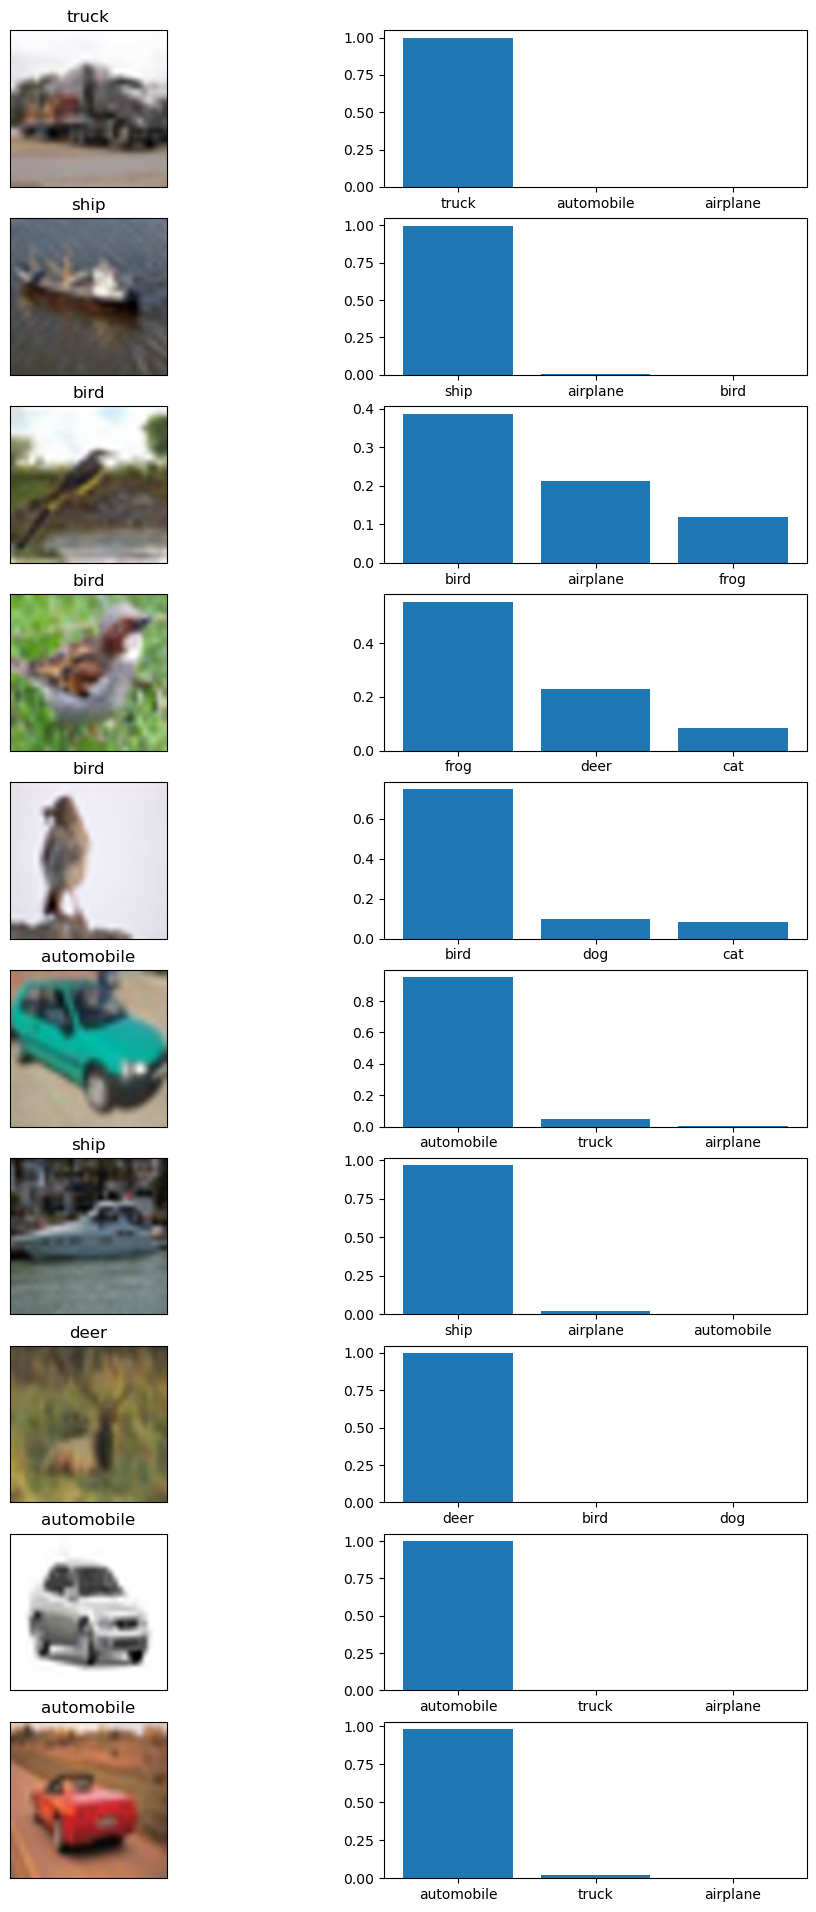

In [122]:
plt.figure(figsize=(12, 24))
idx = np.random.choice(len(x_test), 10, replace=False)

p = model.predict(x_test[idx])

for i in range(len(idx)):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(X_test[idx[i]], interpolation='spline16')
    plt.title(class_names[y_test[idx[i]]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [class_names[l] for l in pred_label]
    
    plt.subplot(10, 2, 2*i+2)
    plt.bar(range(3), pred_prob)
    plt.xticks(range(3), pred_label)

plt.show()

# Top-3 Accuracy Metric 

In [153]:
top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(k=3)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', top_3_accuracy])

In [155]:
results = model.evaluate(x_test, y_test, batch_size=250)
print(f"Loss: {results[0]}")
print(f"Accuracy: {results[1]}")
print(f"Top-3 Accuracy: {results[2]}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 432ms/step - accuracy: 0.7763 - loss: 0.6424 - top_k_categorical_accuracy: 0.9527
Loss: 0.6482400894165039
Accuracy: 0.777999997138977
Top-3 Accuracy: 0.949999988079071
